In [1]:
import os

import requests
import pandas as pd
import matplotlib.pyplot as plt

from utils import (
    FEAR_GREED_DATA_FILE_PATH,
    TRAIN_START_DATE,
    CURRENT_DATE)

TRAIN_START_DATE updated to: 2020-06-01, TRAIN_END_DATE updated to: 2024-07-03


In [2]:
fear_greed_data = pd.DataFrame()

if os.path.exists(FEAR_GREED_DATA_FILE_PATH):
    print(f"The Fear-Greed data is available locally. Reading the file: {FEAR_GREED_DATA_FILE_PATH}")
    fear_greed_data = pd.read_csv(FEAR_GREED_DATA_FILE_PATH)

else: 
    print(f'Fetching online ohlcv data from {TRAIN_START_DATE} till {CURRENT_DATE}')

    def get_fear_greed_index():
        url = 'https://api.alternative.me/fng/?limit=0'
        response = requests.get(url)
        data = response.json()
        df = pd.DataFrame(data['data'])
        df['timestamp'] = pd.to_numeric(df['timestamp'])  # Ensure the timestamp is numeric
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
        df['date'] = df['timestamp'].dt.date  # Create a new 'date' column
        df = df.drop(columns=['timestamp'])  # Drop the 'timestamp' column
        return df

    # Fetch the data
    fear_greed_data = get_fear_greed_index()

    # Filter the data based on TRAIN_START_DATE
    fear_greed_data['date'] = pd.to_datetime(fear_greed_data['date'])
    fear_greed_data = fear_greed_data[fear_greed_data['date'] >= TRAIN_START_DATE]

    fear_greed_data = fear_greed_data.drop(columns=['time_until_update'])
    
    # Sort the data by date
    fear_greed_data = fear_greed_data.sort_values(by='date')

    # Write the sorted data to a CSV file
    fear_greed_data.to_csv(FEAR_GREED_DATA_FILE_PATH, index=False)

fear_greed_data.head(20)

Fetching online ohlcv data from 2020-06-01 till 2024-08-09


,value,value_classification,date
1530,50,Neutral,2020-06-01
1529,56,Greed,2020-06-02
1528,48,Neutral,2020-06-03
1527,54,Neutral,2020-06-04
1526,53,Neutral,2020-06-05
1525,54,Neutral,2020-06-06
1524,54,Neutral,2020-06-07
1523,53,Neutral,2020-06-08
1522,52,Neutral,2020-06-09
1521,54,Neutral,2020-06-10


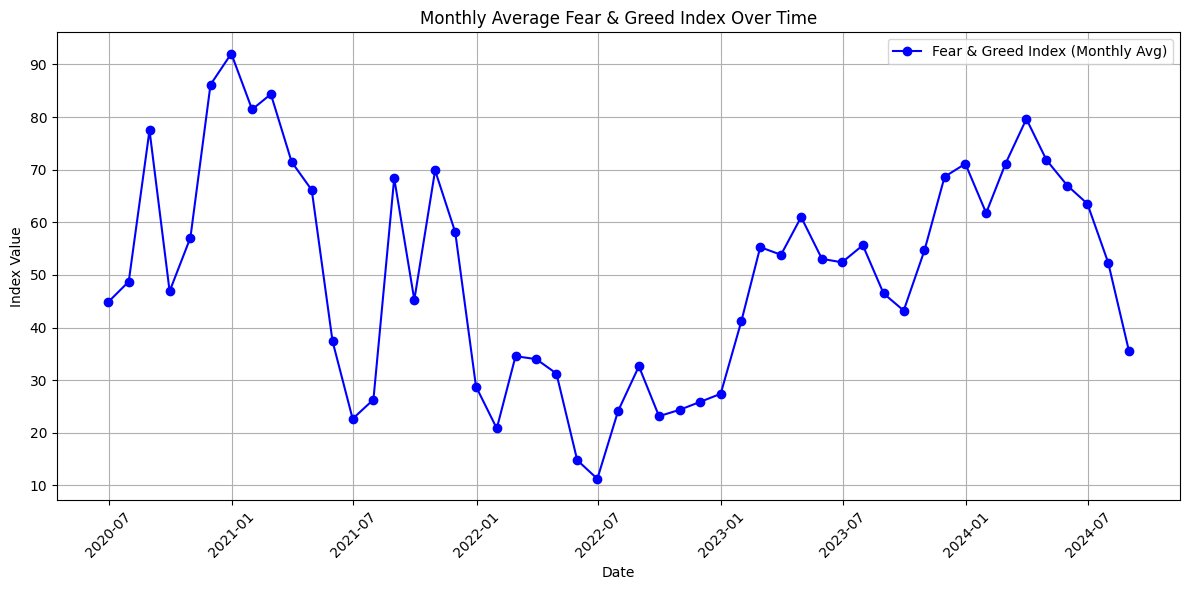

In [3]:
# Reset index and convert date and value columns to appropriate types
fear_greed_data.reset_index(inplace=True)
fear_greed_data['date'] = pd.to_datetime(fear_greed_data['date'])
fear_greed_data['value'] = pd.to_numeric(fear_greed_data['value'], errors='coerce')

# Remove non-numeric columns before resampling
numeric_data = fear_greed_data[['date', 'value']]

# Set date as index and resample to get monthly averages
numeric_data.set_index('date', inplace=True)
monthly_avg = numeric_data.resample('ME').mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Plot the monthly average Fear & Greed index values
plt.plot(monthly_avg['date'], monthly_avg['value'], marker='o', linestyle='-', color='b', label='Fear & Greed Index (Monthly Avg)')

# Formatting the plot
plt.title('Monthly Average Fear & Greed Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()